<a href="https://www.kaggle.com/code/shaikhabdulrafay03/bank-churn-dataset?scriptVersionId=158203558" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [6]:
df = pd.read_csv(r'/kaggle/input/playground-series-s4e1/train.csv' , index_col='id')
test = pd.read_csv(r"/kaggle/input/playground-series-s4e1/test.csv")
df.head()

CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
id                                                                           
0     15674932  Okwudilichukwu          668    France   Male  33.0       3   
1     15749177   Okwudiliolisa          627    France   Male  33.0       1   
2     15694510           Hsueh          678    France   Male  40.0      10   
3     15741417             Kao          581    France   Male  34.0       2   
4     15766172       Chiemenam          716     Spain   Male  33.0       5   

      Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
id                                                                         
0        0.00              2        1.0             0.0        181449.97   
1        0.00              2        1.0             1.0         49503.50   
2        0.00              2        1.0             0.0        184866.69   
3   148882.54              1        1.0             1.0         84560.88   
4        0.00              2        1.0             1.0         15068.83   

    Exited  
id          
0        0  
1        0  
2        0  
3        0  
4        0

In [7]:
print("DataFrame Information:")
print("-" * 30)
print('DF Shape: ' ,df.shape)
print('number of Columns: ' ,len(df.columns))
print('number of Observations: ' ,len(df))
print('Number of values in df: ' , df.count().sum())
print('Total Number of Missing values in df: ' , df.isna().sum().sum())
print('percentage of Missing values : ' ,  "{:.2f}".format(df.isna().sum().sum()/df.count().sum() *100),'%')
print('Total Number of Duplicated records in df : ' , df.duplicated().sum().sum())
print('percentage of Duplicated values : ' ,  "{:.2f}".format(df.duplicated().sum().sum()/df.count().sum() *100),'%')

DataFrame Information:
------------------------------
DF Shape:  (165034, 13)
number of Columns:  13
number of Observations:  165034
Number of values in df:  2145442
Total Number of Missing values in df:  0
percentage of Missing values :  0.00 %
Total Number of Duplicated records in df :  0
percentage of Duplicated values :  0.00 %


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 17.6+ MB


In [9]:
df.nunique()

CustomerId         23221
Surname             2797
CreditScore          457
Geography              3
Gender                 2
Age                   71
Tenure                11
Balance            30075
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    55298
Exited                 2
dtype: int64

In [10]:
df.describe()

CustomerId    CreditScore            Age         Tenure  \
count  1.650340e+05  165034.000000  165034.000000  165034.000000   
mean   1.569201e+07     656.454373      38.125888       5.020353   
std    7.139782e+04      80.103340       8.867205       2.806159   
min    1.556570e+07     350.000000      18.000000       0.000000   
25%    1.563314e+07     597.000000      32.000000       3.000000   
50%    1.569017e+07     659.000000      37.000000       5.000000   
75%    1.575682e+07     710.000000      42.000000       7.000000   
max    1.581569e+07     850.000000      92.000000      10.000000   

             Balance  NumOfProducts      HasCrCard  IsActiveMember  \
count  165034.000000  165034.000000  165034.000000   165034.000000   
mean    55478.086689       1.554455       0.753954        0.497770   
std     62817.663278       0.547154       0.430707        0.499997   
min         0.000000       1.000000       0.000000        0.000000   
25%         0.000000       1.000000       1.000000        0.000000   
50%         0.000000       2.000000       1.000000        0.000000   
75%    119939.517500       2.000000       1.000000        1.000000   
max    250898.090000       4.000000       1.000000        1.000000   

       EstimatedSalary         Exited  
count    165034.000000  165034.000000  
mean     112574.822734       0.211599  
std       50292.865585       0.408443  
min          11.580000       0.000000  
25%       74637.570000       0.000000  
50%      117948.000000       0.000000  
75%      155152.467500       0.000000  
max      199992.480000       1.000000

In [11]:
df.describe(include='O')

Surname Geography  Gender
count   165034    165034  165034
unique    2797         3       2
top       Hsia    France    Male
freq      2456     94215   93150

In [12]:

fig = make_subplots(rows=2, cols=2 ,subplot_titles=['Geography','Gender' , 'Surname'] )
# Add histograms
fig.add_trace(go.Histogram(x=df['Geography']), row=1, col=1)
fig.add_trace(go.Histogram(x=df['Gender']), row=1, col=2)
fig.add_trace(go.Histogram(x=df['Surname']), row=2, col=1)

# Show the plot
fig.show()

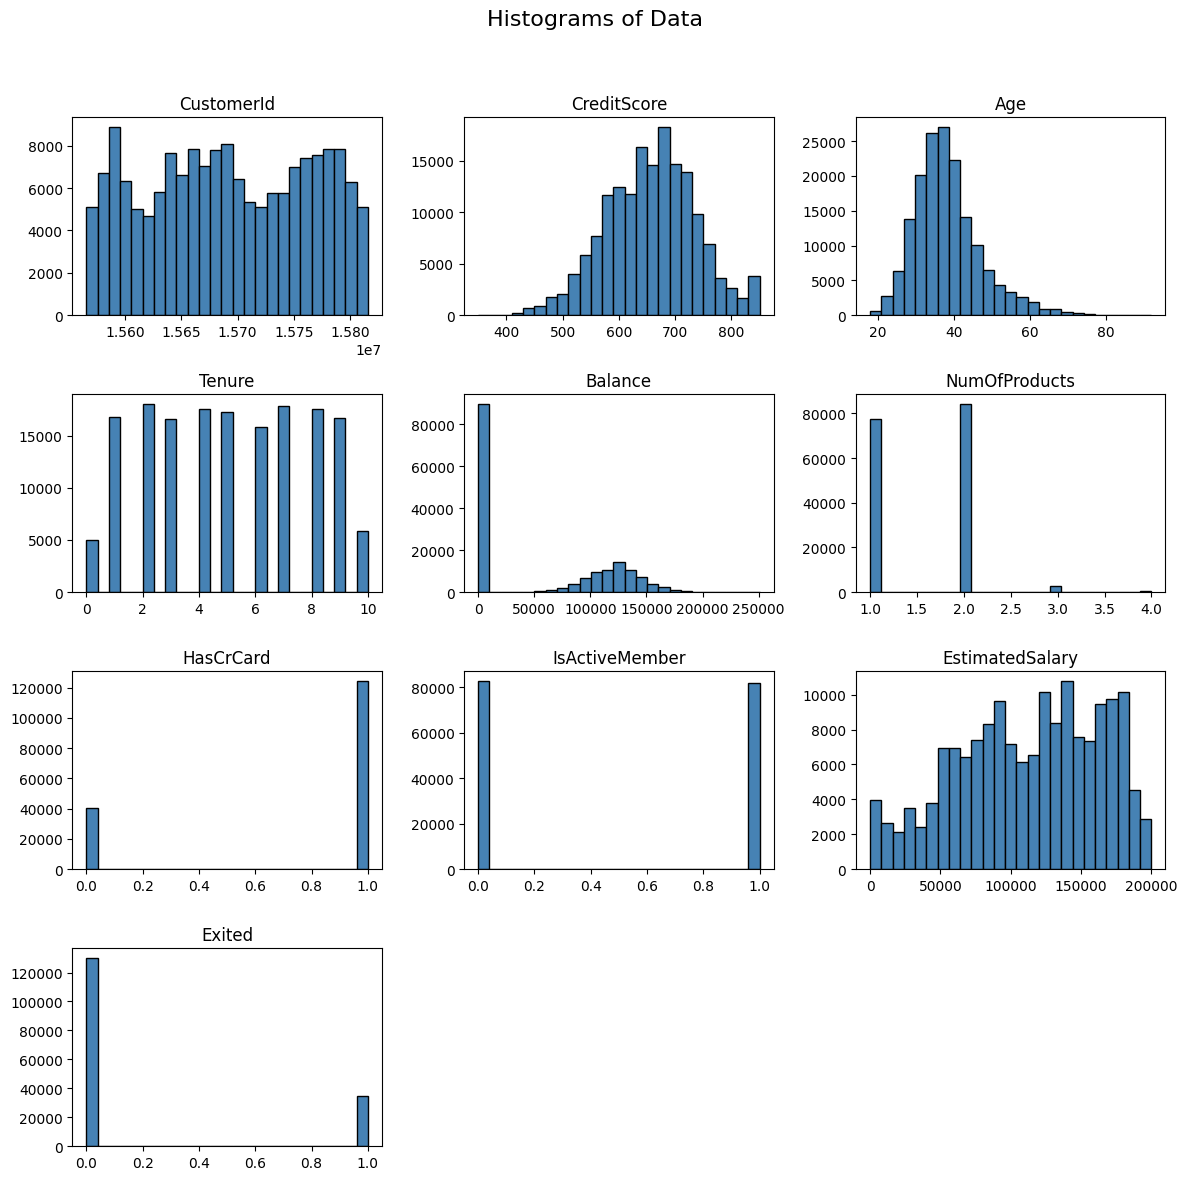

In [13]:
df.hist(bins = 25, color='steelblue', edgecolor='black', grid=False , figsize = (12, 12) )
# Add titles and labels
plt.suptitle('Histograms of Data', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust spacing between subplots
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Modify tick font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove outer spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

In [14]:
feature = []
for i in df.columns:
    if df[i].nunique() > 11  and df[i].dtype != 'object':
        feature.append(i)

feature.remove('CustomerId')
feature

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [15]:
from sklearn.ensemble import IsolationForest
IF = IsolationForest(contamination=0.1 , random_state=42)
IF.fit(df[feature])
df['anomaly_scores'] = IF.decision_function(df[feature])
df['anomaly'] = IF.predict(df[feature])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



In [16]:
df['anomaly'].value_counts()

anomaly
 1    148530
-1     16504
Name: count, dtype: int64

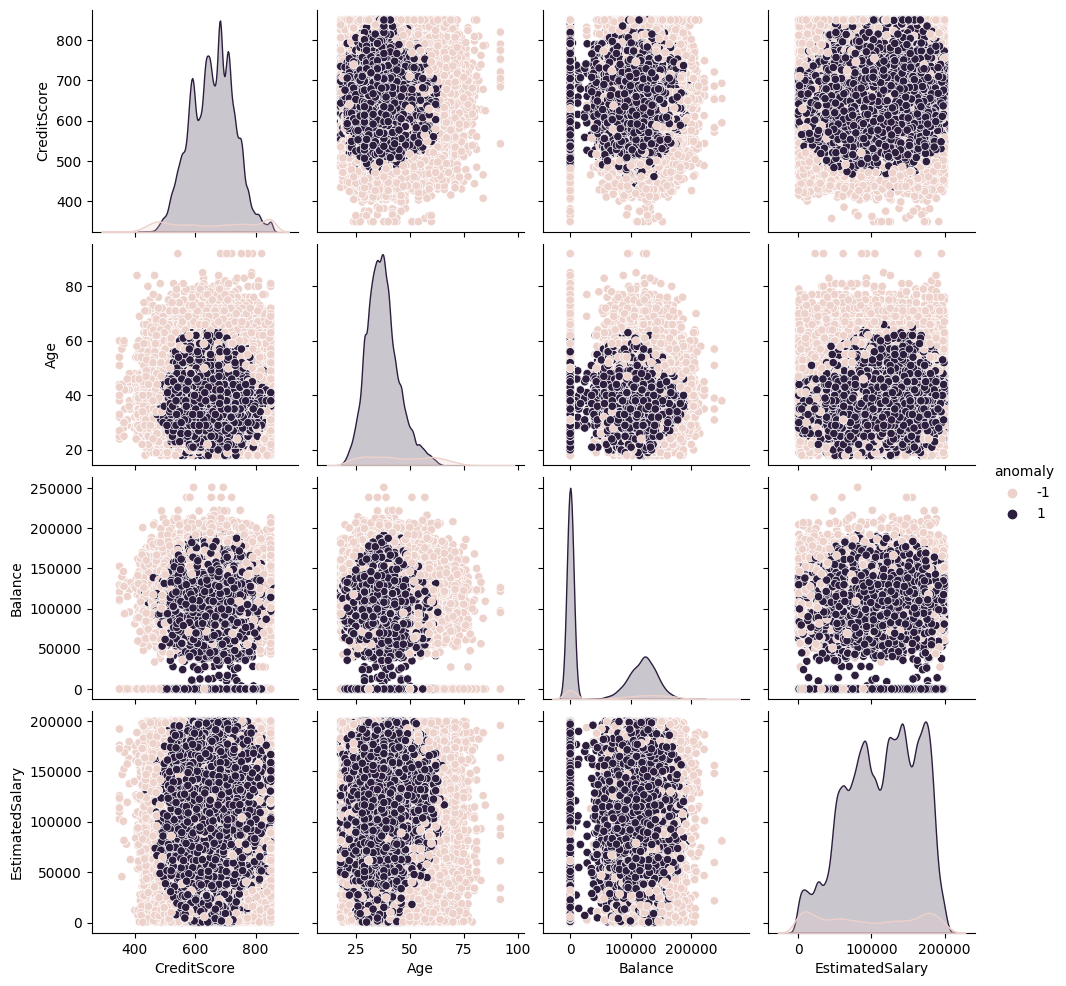

In [17]:
sns.pairplot(df , vars=feature ,hue= 'anomaly')

In [18]:
df.drop(df.loc[df['anomaly']==-1].index, inplace=True)
df.reset_index()
df.drop(['anomaly' , 'anomaly_scores' ], axis = 1 , inplace= True)
df

CustomerId         Surname  CreditScore Geography  Gender   Age  \
id                                                                        
0         15674932  Okwudilichukwu          668    France    Male  33.0   
1         15749177   Okwudiliolisa          627    France    Male  33.0   
2         15694510           Hsueh          678    France    Male  40.0   
3         15741417             Kao          581    France    Male  34.0   
4         15766172       Chiemenam          716     Spain    Male  33.0   
...            ...             ...          ...       ...     ...   ...   
165027    15703793           Bevan          767    France  Female  44.0   
165029    15667085            Meng          667     Spain  Female  33.0   
165030    15665521       Okechukwu          792    France    Male  35.0   
165031    15664752            Hsia          565    France    Male  31.0   
165032    15689614          Hsiung          554     Spain  Female  30.0   

        Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
id                                                                    
0            3       0.00              2        1.0             0.0   
1            1       0.00              2        1.0             1.0   
2           10       0.00              2        1.0             0.0   
3            2  148882.54              1        1.0             1.0   
4            5       0.00              2        1.0             1.0   
...        ...        ...            ...        ...             ...   
165027       4   76554.06              2        1.0             0.0   
165029       2       0.00              1        1.0             1.0   
165030       3       0.00              1        0.0             0.0   
165031       5       0.00              1        1.0             1.0   
165032       7  161533.00              1        0.0             1.0   

        EstimatedSalary  Exited  
id                               
0             181449.97       0  
1              49503.50       0  
2             184866.69       0  
3              84560.88       0  
4              15068.83       0  
...                 ...     ...  
165027         77837.63       0  
165029        131834.75       0  
165030        131834.45       0  
165031        127429.56       0  
165032         71173.03       0  

[148530 rows x 13 columns]

In [19]:
df[feature].skew()

CreditScore       -0.026462
Age                0.584496
Balance            0.422452
EstimatedSalary   -0.302257
dtype: float64

In [20]:
from sklearn.preprocessing import LabelEncoder
ft = ['Geography','Gender' , 'Surname']
le = LabelEncoder()
for i in ft:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    test[i] = le.transform(test[i])

ValueError: y contains previously unseen labels: 'Slater'

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in feature:
    sc.fit(df)
    df = sc.transform(df)
    test = sc.transform(test)


In [ ]:
df.hist(bins = 25, color='steelblue', edgecolor='black', grid=False , figsize = (12, 12) )
# Add titles and labels
plt.suptitle('Histograms of Data', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust spacing between subplots
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Modify tick font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove outer spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()